In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter



In [65]:
inventory_data = pd.read_csv("inventory_transactions.csv")

In [66]:
inventory_data['Date'] = pd.to_datetime(inventory_data['Date'])

In [67]:
inventory_data.sort_values('Date', inplace=True)

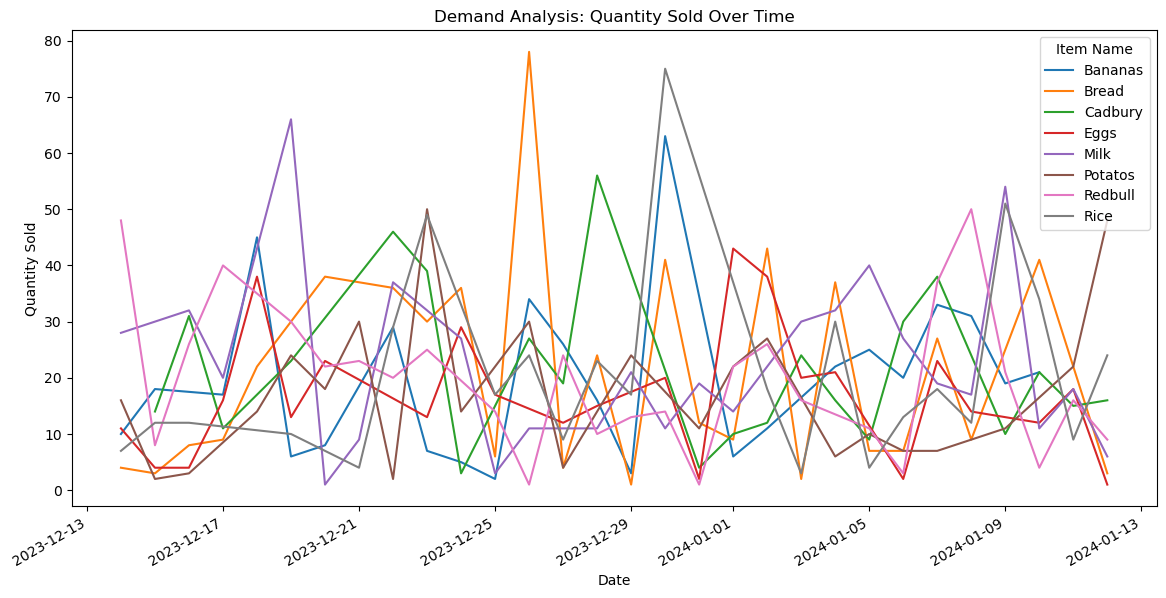

In [68]:
# Demand Analysis: Plot quantity sold over time for each item
demand_fig, demand_ax = plt.subplots(figsize=(14, 7))
for item_name, group_data in inventory_data[inventory_data['Transaction_Type'] == 'Sale'].groupby('Item_Name'):
    group_data.groupby('Date')['Quantity'].sum().plot(ax=demand_ax, label=item_name)
demand_ax.set_title('Demand Analysis: Quantity Sold Over Time')
demand_ax.set_xlabel('Date')
demand_ax.set_ylabel('Quantity Sold')
demand_ax.legend(title='Item Name')
demand_ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
demand_ax.figure.autofmt_xdate()


Text(0, 0.5, 'Item Name')

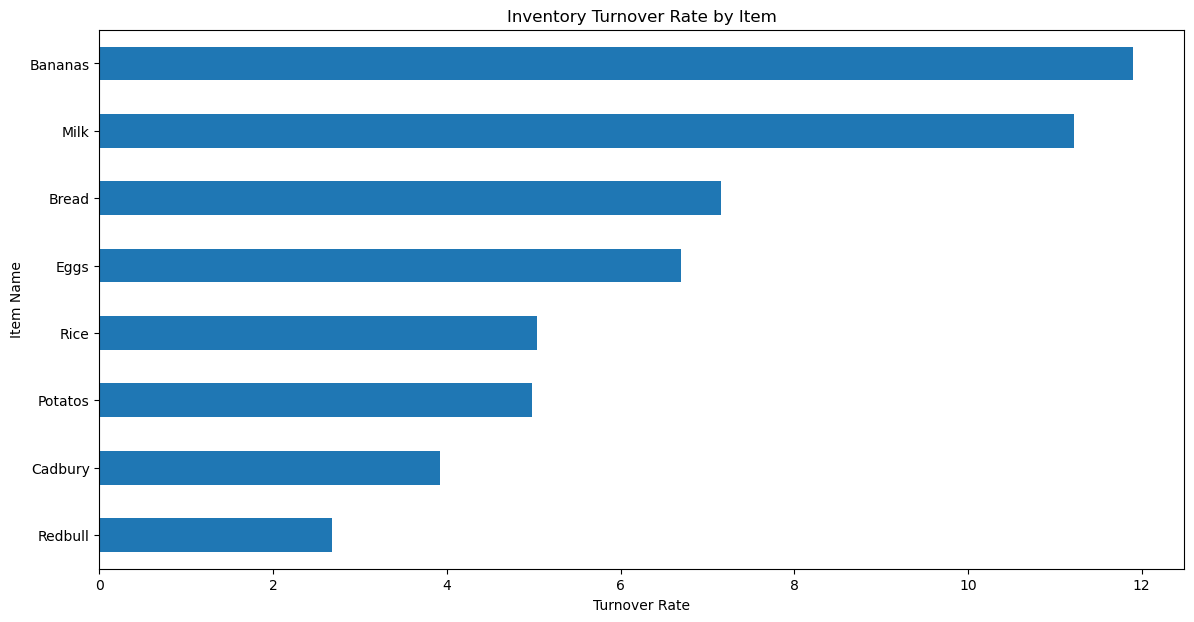

In [69]:
# Inventory Turnover: Calculate and plot the turnover rate for each item
inventory_turnover = inventory_data.groupby('Item_Name').apply(
    lambda x: (x[x['Transaction_Type'] == 'Sale']['Quantity'].sum() / 
               ((x['Initial_Quantity'] + x['New_Quantity']) / 2).mean()))
turnover_fig, turnover_ax = plt.subplots(figsize=(14, 7))
inventory_turnover.sort_values().plot(kind='barh', ax=turnover_ax)
turnover_ax.set_title('Inventory Turnover Rate by Item')
turnover_ax.set_xlabel('Turnover Rate')
turnover_ax.set_ylabel('Item Name')

In [76]:
# Ensure 'inventory_data' is your DataFrame with the inventory transactions
# Filter out sales transactions where the sale quantity is greater than the initial quantity
stockouts_data = inventory_data[
    (inventory_data['Transaction_Type'] == 'Sale') & 
    (inventory_data['Quantity'] > inventory_data['Initial_Quantity'])
]

# Count the number of potential stockouts for each item
stockouts_count = stockouts_data.groupby('Item_Name').size()

# Check if 'stockouts_count' is empty
if not stockouts_count.empty:
    # Plot the stockouts since we have data
    stockout_fig, stockout_ax = plt.subplots(figsize=(14, 7))
    stockouts_count.plot(kind='bar', ax=stockout_ax)
    stockout_ax.set_title('Potential Out-of-Stock Situations by Item')
    stockout_ax.set_xlabel('Item Name')
    stockout_ax.set_ylabel('Number of Potential Stockouts')
    plt.show()
else:
    print("No potential stockouts found.")


No potential stockouts found.


In [74]:
print("Inventory Turnover Rates:\n", inventory_turnover)
print("\nPotential Out-of-Stock Situations:\n", stockouts_count)

Inventory Turnover Rates:
 Item_Name
Bananas    11.896524
Bread       7.154955
Cadbury     3.923532
Eggs        6.700693
Milk       11.219435
Potatos     4.980781
Redbull     2.681440
Rice        5.042521
dtype: float64

Potential Out-of-Stock Situations:
 Series([], dtype: int64)


In [77]:
# Filter only the sale transactions
sales_data = inventory_data[inventory_data['Transaction_Type'] == 'Sale']

# Sum the quantity sold for each item and sort in descending order
top_selling_items = sales_data.groupby('Item_Name')['Quantity'].sum().sort_values(ascending=False)

# Get the top 3 selling items
top_3_selling_items = top_selling_items.head(3)

# Print out the top 3 selling items
print(top_3_selling_items)


Item_Name
Milk       564
Bread      537
Redbull    534
Name: Quantity, dtype: int64


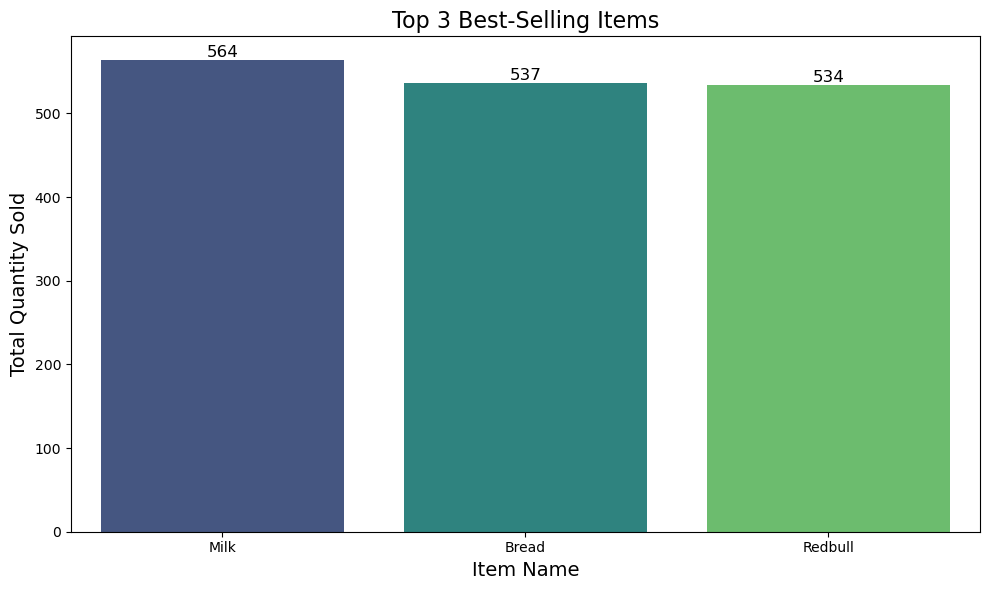

In [78]:
sales_data = inventory_data[inventory_data['Transaction_Type'] == 'Sale']

# Sum the quantity sold for each item and sort in descending order
top_selling_items = sales_data.groupby('Item_Name')['Quantity'].sum().sort_values(ascending=False)

# Get the top 3 selling items
top_3_selling_items = top_selling_items.head(3)

# Plotting the top 3 selling items
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_selling_items.index, y=top_3_selling_items.values, palette='viridis')

# Adding title and labels
plt.title('Top 3 Best-Selling Items', fontsize=16)
plt.xlabel('Item Name', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)

# Adding the value labels on top of each bar
for index, value in enumerate(top_3_selling_items.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

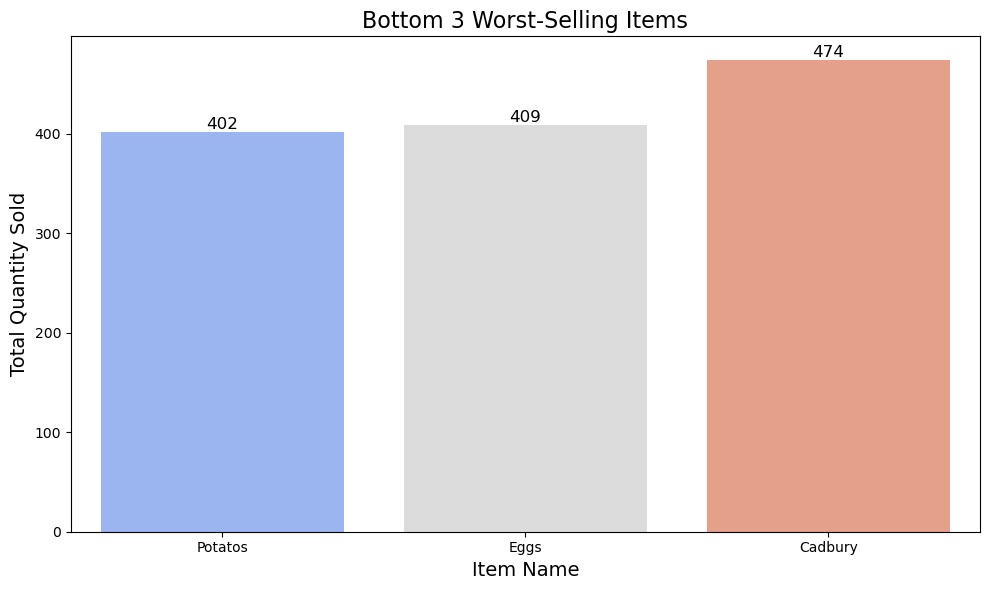

In [79]:
sales_data = inventory_data[inventory_data['Transaction_Type'] == 'Sale']

# Sum the quantity sold for each item and sort in ascending order to get the least selling items
worst_selling_items = sales_data.groupby('Item_Name')['Quantity'].sum().sort_values(ascending=True)

# Get the bottom 3 selling items
bottom_3_selling_items = worst_selling_items.head(3)

# Plotting the bottom 3 selling items
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_3_selling_items.index, y=bottom_3_selling_items.values, palette='coolwarm')

# Adding title and labels
plt.title('Bottom 3 Worst-Selling Items', fontsize=16)
plt.xlabel('Item Name', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)

# Adding the value labels on top of each bar
for index, value in enumerate(bottom_3_selling_items.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [81]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert predictions back to original scale
train

In [82]:
data = pd.read_csv("inventory_transactions.csv")

In [83]:
# Preprocess the data: Ensure the data is sorted by date and aggregated by date for all items
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
daily_sales = data[data['Transaction_Type'] == 'Sale'].groupby('Date')['Quantity'].sum()

In [84]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

In [85]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X, y = create_dataset(scaled_sales, look_back)


In [86]:
# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train_X, train_y = X[:train_size], y[:train_size]
test_X, test_y = X[train_size:], y[train_size:]

In [87]:
# Reshape input to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [88]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [89]:
# Train the model
model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
18/18 - 1s - loss: 0.2596 - 744ms/epoch - 41ms/step
Epoch 2/100
18/18 - 0s - loss: 0.2070 - 17ms/epoch - 928us/step
Epoch 3/100
18/18 - 0s - loss: 0.1703 - 18ms/epoch - 999us/step
Epoch 4/100
18/18 - 0s - loss: 0.1408 - 16ms/epoch - 902us/step
Epoch 5/100
18/18 - 0s - loss: 0.1271 - 18ms/epoch - 1ms/step
Epoch 6/100
18/18 - 0s - loss: 0.1222 - 16ms/epoch - 862us/step
Epoch 7/100
18/18 - 0s - loss: 0.1164 - 17ms/epoch - 952us/step
Epoch 8/100
18/18 - 0s - loss: 0.1139 - 15ms/epoch - 817us/step
Epoch 9/100
18/18 - 0s - loss: 0.1120 - 16ms/epoch - 915us/step
Epoch 10/100
18/18 - 0s - loss: 0.1094 - 15ms/epoch - 811us/step
Epoch 11/100
18/18 - 0s - loss: 0.1065 - 16ms/epoch - 884us/step
Epoch 12/100
18/18 - 0s - loss: 0.1061 - 15ms/epoch - 808us/step
Epoch 13/100
18/18 - 0s - loss: 0.1026 - 16ms/epoch - 875us/step
Epoch 14/100
18/18 - 0s - loss: 0.1025 - 15ms/epoch - 822us/step
Epoch 15/100
18/18 - 0s - loss: 0.1006 - 17ms/epoch - 943us/step
Epoch 16/100
18/18 - 0s - loss: 0.09

In [90]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

1/1 [==============================] - 0s 11ms/step


Train Score: 50.75 RMSE
Test Score: 36.33 RMSE


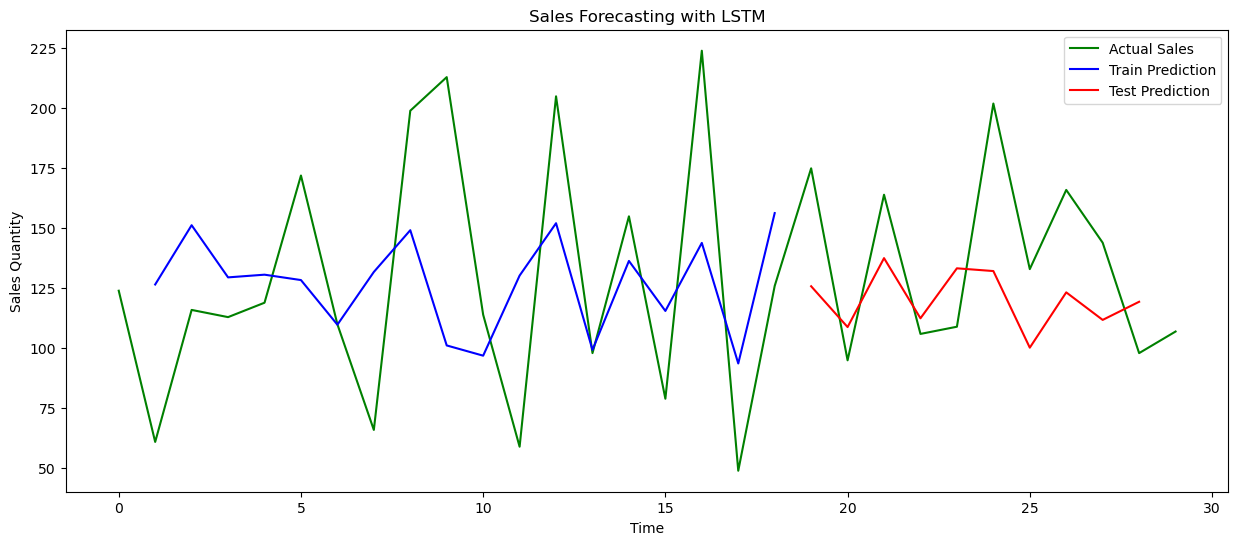

In [91]:
# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_sales = scaler.inverse_transform(scaled_sales)

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(original_sales[look_back:train_size+look_back], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(original_sales[train_size+look_back:-1], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

# Shift train predictions for plotting
train_predict_plot = np.empty_like(scaled_sales)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:train_size+look_back, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(scaled_sales)
test_predict_plot[:, :] = np.nan
test_predict_plot[train_size+look_back:-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(original_sales, label='Actual Sales', c='g')
plt.plot(train_predict_plot, label='Train Prediction', c='b')
plt.plot(test_predict_plot, label='Test Prediction', c='r')
plt.title('Sales Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

In [92]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [93]:
# Load and preprocess the data
data = pd.read_csv('inventory_transactions.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data = data[data['Transaction_Type'] == 'Sale']


In [94]:
# Aggregate sales by date for all items
daily_sales = data.groupby(['Date', 'Item_Name'])['Quantity'].sum().reset_index()
daily_sales = daily_sales.pivot(index='Date', columns='Item_Name', values='Quantity').fillna(0)


In [95]:
# Normalize the data with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(daily_sales)

In [96]:
# Create a TimeSeriesGenerator instance
look_back = 3
train_size = int(len(scaled_sales) * 0.67)
test_size = len(scaled_sales) - train_size
train, test = scaled_sales[:train_size, :], scaled_sales[train_size:, :]

train_generator = TimeseriesGenerator(train, train, length=look_back, batch_size=1)
test_generator = TimeseriesGenerator(test, test, length=look_back, batch_size=1)


In [97]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(look_back, daily_sales.shape[1])))
model.add(Dense(daily_sales.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [98]:
# Use early stopping to halt training when validation loss is not decreasing
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(train_generator, validation_data=test_generator, epochs=100, callbacks=[early_stopping], verbose=1)

# Predicting future demand
prediction = model.predict(test_generator)

# Inverting the scale of prediction to original
prediction_inverse = scaler.inverse_transform(prediction)

Epoch 1/100
17/17 [==============================] - 1s 10ms/step - loss: 0.1481 - val_loss: 0.1100
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1119 - val_loss: 0.0826
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0860 - val_loss: 0.0697
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0783 - val_loss: 0.0699
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0781 - val_loss: 0.0670
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0747 - val_loss: 0.0676
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0734 - val_loss: 0.0682
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0721 - val_loss: 0.0700
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0712 - val_loss: 0.0694
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 11

In [105]:
# Select the indices for the test set to align the predictions with the actual data
test_indices = range(train_size + look_back, len(daily_sales))

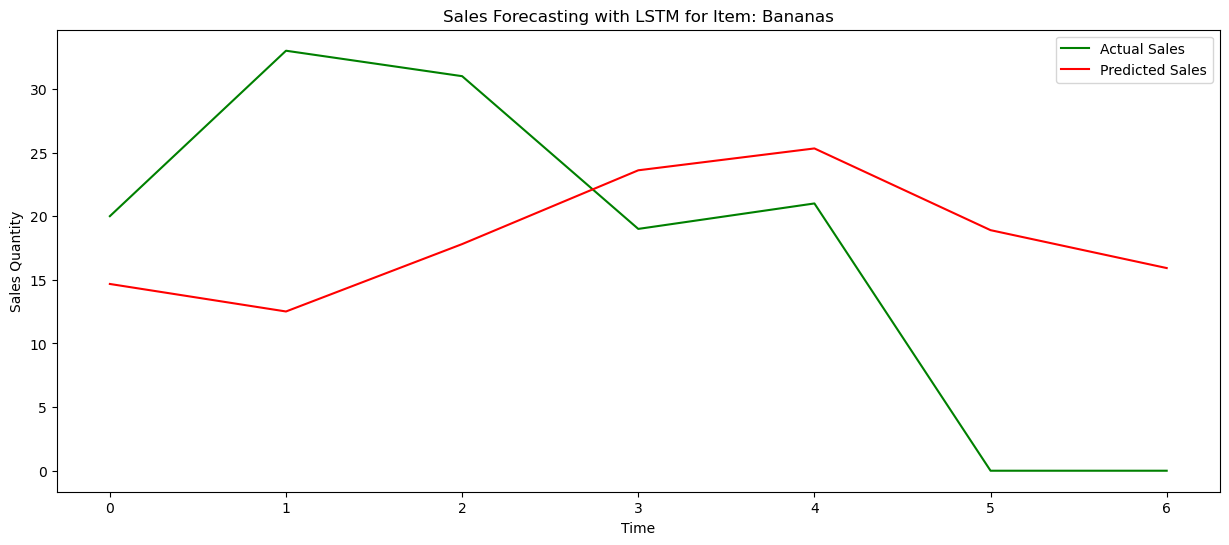

In [108]:
adjusted_test_indices = [i - train_size for i in test_indices]

# Inverse transform the test data to original scale
test_data_inverse = scaler.inverse_transform(test)

# Plotting predictions
plt.figure(figsize=(15, 6))

# Example: plotting the first item's data and predictions
item_index = 0  # Replace with the index of the item you want to plot
plt.plot(test_data_inverse[adjusted_test_indices, item_index], label='Actual Sales', c='g')
plt.plot(prediction_inverse[:, item_index], label='Predicted Sales', c='r')
plt.title('Sales Forecasting with LSTM for Item: ' + daily_sales.columns[item_index])
plt.xlabel('Time')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

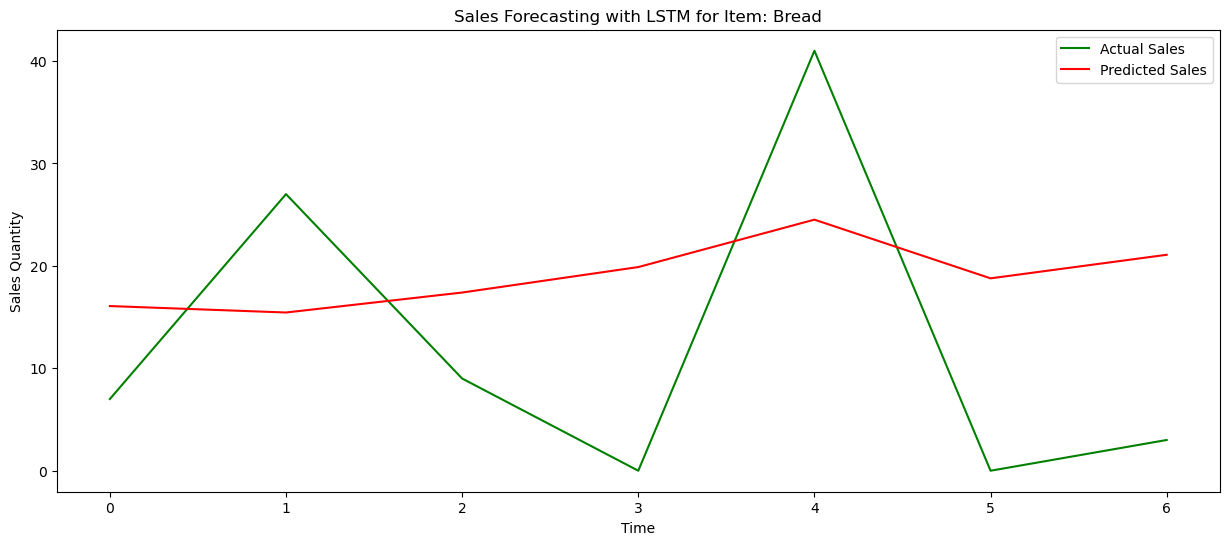

In [109]:

# Plotting predictions
plt.figure(figsize=(15, 6))

# Example: plotting the next item's data and predictions
item_index += 1  # Increment the index to the next item
plt.plot(test_data_inverse[adjusted_test_indices, item_index], label='Actual Sales', c='g')
plt.plot(prediction_inverse[:, item_index], label='Predicted Sales', c='r')
plt.title('Sales Forecasting with LSTM for Item: ' + daily_sales.columns[item_index])
plt.xlabel('Time')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

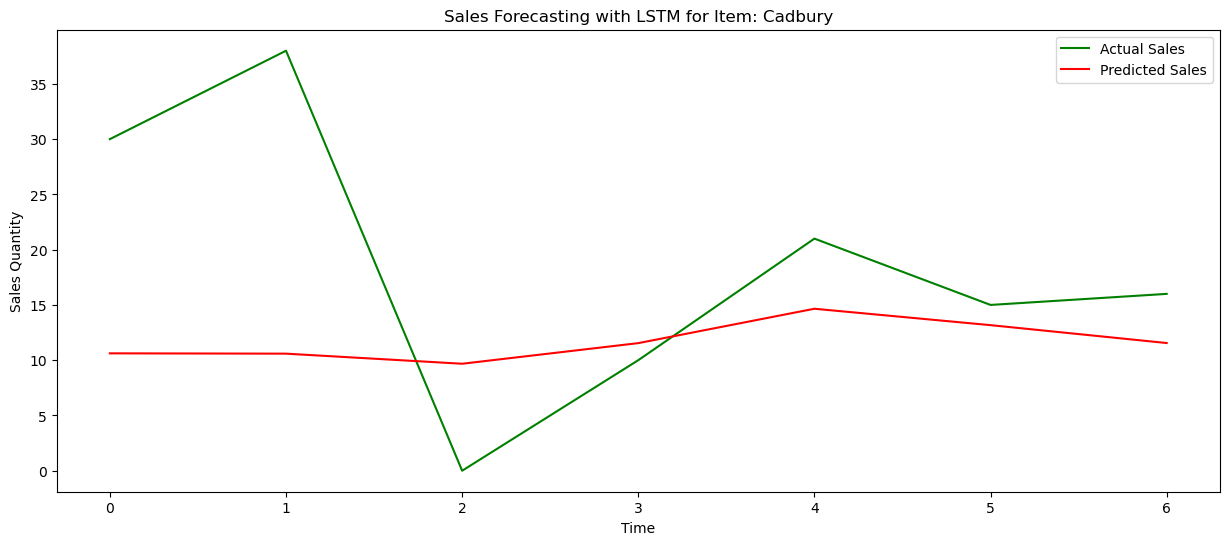

In [110]:
# Plotting predictions
plt.figure(figsize=(15, 6))

# Example: plotting the next item's data and predictions
item_index += 1  # Increment the index to the next item
plt.plot(test_data_inverse[adjusted_test_indices, item_index], label='Actual Sales', c='g')
plt.plot(prediction_inverse[:, item_index], label='Predicted Sales', c='r')
plt.title('Sales Forecasting with LSTM for Item: ' + daily_sales.columns[item_index])
plt.xlabel('Time')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()


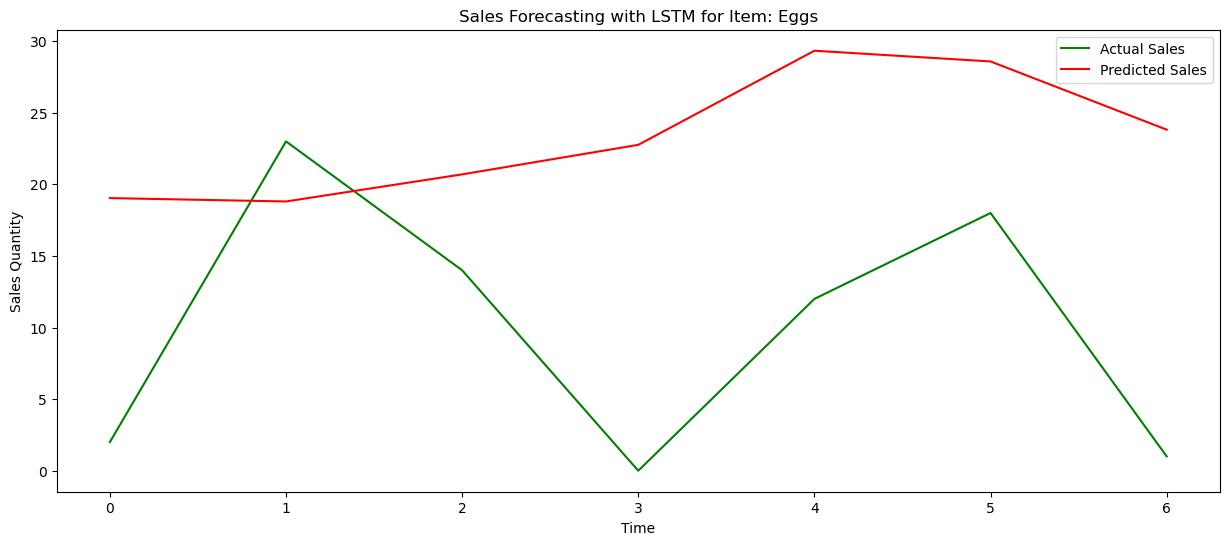

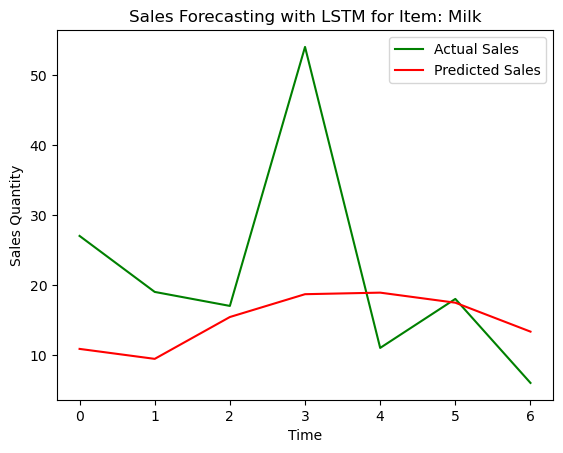

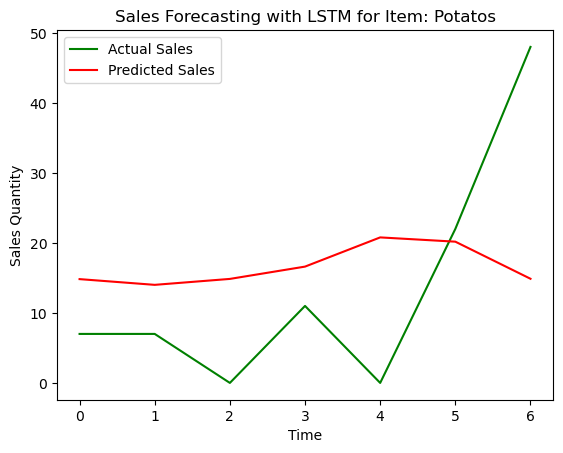

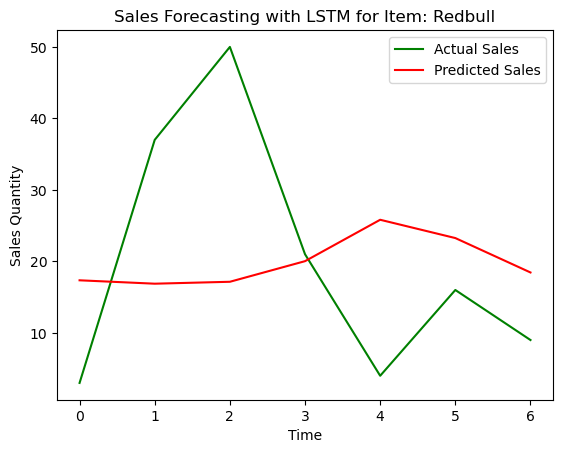

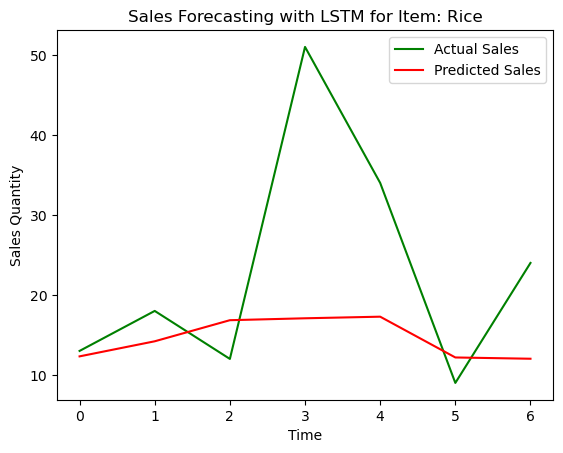

In [111]:
# Plotting predictions
plt.figure(figsize=(15, 6))

# Start the loop from the current item_index
for _ in range(5):  # Adjust the range as needed or use a condition to stop the loop

    # Increment the index to the next item
    item_index += 1  
    
    # Plot the actual and predicted sales for the next item
    plt.plot(test_data_inverse[adjusted_test_indices, item_index], label='Actual Sales', c='g')
    plt.plot(prediction_inverse[:, item_index], label='Predicted Sales', c='r')
    plt.title('Sales Forecasting with LSTM for Item: ' + daily_sales.columns[item_index])
    plt.xlabel('Time')
    plt.ylabel('Sales Quantity')
    plt.legend()
    plt.show()
